<a href="https://colab.research.google.com/github/gm965/Machine-learning/blob/master/Vending/Preanalysis/Vending_2_consumption_ML_approach_analysis_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INSTALLATION PRE-REQUISITE**

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 3.9MB/s 
     |████████████████████████████████| 112kB 23.1MB/s 
     |████████████████████████████████| 14.2MB 266kB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 276kB 41.4MB/s 
     |████████████████████████████████| 256kB 34.8MB/s 
     |████████████████████████████████| 6.8MB 30.4MB/s 
     |████████████████████████████████| 174kB 44.2MB/s 
     |████████████████████████████████| 1.7MB 39.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 33.6MB/s 
     |████████████████████████████████| 2.0MB 28.2MB/s 
     |████████████████████████████████| 174kB 49.0MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 


#**PREPAYMENT DATA**

In [1]:
import pandas as pd

import os
import io
import math
import warnings
warnings.filterwarnings('ignore')

#Library for importing files in local drive in colab notebook
from google.colab import files


In [2]:
#Import Monthly vending kWh and Actual kWh reading data
uploaded = files.upload()

KeyboardInterrupt: ignored

In [4]:
consumption = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='Reading summary')
consumption.head()


,kno,2021-04-01 00:00:00,2021-03-01 00:00:00,2021-02-01 00:00:00,2021-01-01 00:00:00,2020-12-01 00:00:00,2020-11-01 00:00:00,2020-10-01 00:00:00,2020-09-01 00:00:00,2020-08-01 00:00:00,2020-07-01 00:00:00,2020-06-01 00:00:00,2020-05-01 00:00:00,2020-04-01 00:00:00,2020-03-01 00:00:00,2020-02-01 00:00:00,2020-01-01 00:00:00,2019-12-01 00:00:00,2019-11-01 00:00:00,2019-10-01 00:00:00,2019-09-01 00:00:00,2019-08-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00,2019-05-01 00:00:00,2019-04-01 00:00:00,2019-03-01 00:00:00,2019-02-01 00:00:00,2019-01-01 00:00:00,2018-12-01 00:00:00,2018-11-01 00:00:00,2018-10-01 00:00:00,2018-09-01 00:00:00,2018-08-01 00:00:00,2018-07-01 00:00:00,2018-06-01 00:00:00,2018-05-01 00:00:00,2018-04-01 00:00:00,2018-03-01 00:00:00,2018-02-01 00:00:00,2018-01-01 00:00:00
0,110211000839,43,29,24,6,9,21,49,103,0,62,0,0,0,59,50,33,168,0,143,110,165,29,0,147,69,53,103,0,194,0,130,170,201,57,0,65,151,93,0,134
1,110211001803,168,82,101,41,25,70,82,60,64,18,66,0,0,132,91,69,158,155,230,273,317,38,29,125,107,80,52,64,81,409,0,549,0,417,73,44,0,171,0,181
2,110211002080,293,207,197,213,200,263,294,267,270,295,521,0,0,259,510,378,247,293,300,340,379,356,363,321,274,276,252,268,274,304,335,378,439,362,324,276,550,574,0,547
3,110211002086,85,58,28,30,44,38,50,44,92,75,0,0,0,84,150,0,179,203,357,253,250,50,340,258,116,144,121,72,136,206,209,312,299,128,71,329,0,190,0,425
4,110211002087,915,405,380,316,210,664,863,679,901,1245,0,0,0,556,540,329,807,1100,1944,1702,2187,587,680,1090,671,646,542,454,676,1419,1459,1870,2354,1268,1009,1022,1830,1110,0,1689


In [6]:
final_consumption = consumption.melt(id_vars=['kno'], var_name='Date', value_name='Consumption')
final_consumption.head()

,kno,Date,Consumption
0,110211000839,2021-04-01,43
1,110211001803,2021-04-01,168
2,110211002080,2021-04-01,293
3,110211002086,2021-04-01,85
4,110211002087,2021-04-01,915


In [7]:
final_consumption.info()
#final_consumption["Date"]=pd.to_datetime(final_consumption["Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   kno          10200 non-null  int64         
 1   Date         10200 non-null  datetime64[ns]
 2   Consumption  10200 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 239.2 KB


In [8]:
# storing into the excel file
final_consumption.to_excel("Consumption.xlsx")
files.download('Consumption.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#uploaded = files.upload()

In [9]:
vend_amt_before_prev_year = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='Vend amt in last vend prev year', skiprows = 0, header = 1)
vend_amt_before_prev_year.head()

#Vend amt in last vend prev year

,KNO,2021-05-01 00:00:00,2021-04-01 00:00:00,2021-03-01 00:00:00,2021-02-01 00:00:00,2021-01-01 00:00:00,2020-12-01 00:00:00,2020-11-01 00:00:00,2020-10-01 00:00:00,2020-09-01 00:00:00,2020-08-01 00:00:00,2020-07-01 00:00:00,2020-06-01 00:00:00,2020-05-01 00:00:00,2020-04-01 00:00:00,2020-03-01 00:00:00,2020-02-01 00:00:00,2020-01-01 00:00:00,2019-12-01 00:00:00,2019-11-01 00:00:00,2019-10-01 00:00:00,2019-09-01 00:00:00,2019-08-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00,2019-05-01 00:00:00,2019-04-01 00:00:00,2019-03-01 00:00:00,2019-02-01 00:00:00,2019-01-01 00:00:00,2018-12-01 00:00:00,2018-11-01 00:00:00,2018-10-01 00:00:00,2018-09-01 00:00:00,2018-08-01 00:00:00
0,110211000839,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110211001803,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110211002080,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,11000.0,11000.0,11000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,110211002086,6000.0,6000.0,6000.0,6000.0,5000.0,5000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,3000.0,3000.0,3000.0,3000.0,4000.0,4000.0,3000.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110211002087,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,20000.0,10000.0,10000.0,5000.0,10000.0,3757.0,12000.0,12000.0,10000.0,10000.0,10000.0,20000.0,20000.0,20000.0,10000.0,5000.0,20000.0,20000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
vend_amt_before_prev_year = vend_amt_before_prev_year.melt(id_vars=['KNO'], var_name='Date', value_name='Amount_vend')
vend_amt_before_prev_year.head()

,KNO,Date,Amount_vend
0,110211000839,2021-05-01,5000.0
1,110211001803,2021-05-01,20000.0
2,110211002080,2021-05-01,10000.0
3,110211002086,2021-05-01,6000.0
4,110211002087,2021-05-01,10000.0


In [11]:
# storing into the excel file
vend_amt_before_prev_year.to_excel("Previous to previous year vend.xlsx")
files.download('Previous to previous year vend.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
days_since_lastvend_before_prev_year = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='Days since last vend prev year', skiprows = 0, header = 1)

days_since_lastvend_before_prev_year = days_since_lastvend_before_prev_year.melt(id_vars=['KNO'], var_name='Date', value_name='Days_since_last_vend_prev2_prev_year')
# storing into the excel file
days_since_lastvend_before_prev_year.to_excel("Previous to previous year last vend days.xlsx")
files.download('Previous to previous year last vend days.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
last_vend_amt_prev_year = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='Last vend amt', skiprows = 0, header = 1)

last_vend_amt_prev_year = last_vend_amt_prev_year.melt(id_vars=['KNO'], var_name='Date', value_name='Last_vend_amout_in_prev_year')
#last_vend_amt_prev_year.head()
# storing into the excel file
last_vend_amt_prev_year.to_excel("Last vend amount in prev year.xlsx")
files.download('Last vend amount in prev year.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
days_since_last_vend_in_prev_year = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='Days  since last vend', skiprows = 0, header = 1)

days_since_last_vend_in_prev_year = days_since_last_vend_in_prev_year.melt(id_vars=['KNO'], var_name='Date', value_name='days_since_Last_vend_in_prev_year')
# storing into the excel file
days_since_last_vend_in_prev_year.to_excel("Days since last vend in prev year.xlsx")
files.download('Days since last vend in prev year.xlsx')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
total_vend_in_last_year = pd.read_excel(io.BytesIO(uploaded['Final consolidation.xlsx']), sheet_name='1 year vend', skiprows = 0, header = 1)

total_vend_in_last_year = total_vend_in_last_year.melt(id_vars=['KNO'], var_name='Date', value_name='total_vend_in_last_year')
# storing into the excel file
total_vend_in_last_year.to_excel("Total vend in last year.xlsx")
files.download('Total vend in last year.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**MACHINE LEARNING**

In [3]:
import pandas as pd

import os
import io
import math
import warnings
warnings.filterwarnings('ignore')

#Library for importing files in local drive in colab notebook
from google.colab import files

In [4]:
#Import Monthly vending kWh and Actual kWh reading data
uploaded = files.upload()

Saving Consolidated_data_for_ML.xlsx to Consolidated_data_for_ML.xlsx


In [5]:
df = pd.read_excel(io.BytesIO(uploaded['Consolidated_data_for_ML.xlsx']))
df.head()

,KNO,Date,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,BILL_MONTH,Billed unit,Month,Year,FE_0,FE_1,FE_2,FE_3,Applicability,Tariff
0,110211000839,2021-05-01,5000.0,5000.0,117.0,5000.0,446.0,2021-04-01,43,4,2021,39844.964,40647.499,33233.121,36538.711,1,DSLT
1,110211001803,2021-05-01,15000.0,10000.0,100.0,20000.0,870.0,2021-04-01,168,4,2021,39844.964,40647.499,33233.121,36538.711,1,NDLS
2,110211002080,2021-05-01,30000.0,10000.0,108.0,10000.0,408.0,2021-04-01,293,4,2021,39844.964,40647.499,33233.121,36538.711,1,NDLS
3,110211002086,2021-05-01,10000.0,5000.0,245.0,6000.0,479.0,2021-04-01,85,4,2021,39844.964,40647.499,33233.121,36538.711,1,NDLS
4,110211002087,2021-05-01,79830.0,20000.0,32.0,10000.0,436.0,2021-04-01,915,4,2021,39844.964,40647.499,33233.121,36538.711,1,NDLS


In [6]:
# Creating a funtion to summarize dataframe information

def data_summary(df):
    '''Summary dataframe information'''

    df = pd.DataFrame({'type': df.dtypes,
                       'null_count': df.isna().sum(),
                       'null_count (%)': (df.isna().sum() / df.shape[0]) * 100,
                       'unique': df.nunique()})
    return df

In [9]:
#Function to prepare training and testing dataset
def prepare_train_test_data(df, test_data_month = 2):
  #Get the maximum year and maximum month for which data available
  max_year = df["Year"].max()
  max_month = df[df["Year"]==max_year]["Month"].max()
  if max_month > test_data_month:

    #Training data preparation
    #Data till Dec of previous year
    train_data_till_previous_year = df[df["Year"]<max_year]
    #Data for this year till last to last month (e.g. if data is available till april, then this will give data till 28th Feb)
    train_data_current_year_till_prev2prev_month = df[(df["Year"]==max_year) & (df["Month"]<max_month-1)]
    #Total training data
    train_data = pd.concat([train_data_current_year_till_prev2prev_month,train_data_till_previous_year],axis = 0, ignore_index = True)

    #Test data preparation (Last two month data will be used for testing purpose - Mar and april 2021)
    test_data = df[(df["Year"]==max_year) & (df["Month"]>=max_month-1)]
  
  elif max_month == test_data_month:
    #Training data preparation
    #Data till Dec of previous year
    train_data = df[df["Year"]<max_year]
    
    #Test data preparation (Jan and Feb)
    test_data = df[df["Year"]==max_year]
  
  else:
    #Training data preparation
    #Data till Nov of previous year
    train_data = df[(df["Year"]<max_year) & (df["Month"]<12)]
    
    #Test data preparation (Last two month data will be used for testing purpose - Jan of current year and Dec of previous year)
    test_data_current_year = df[df["Year"]==max_year]
    test_data_prev_year = df[(df["Year"]<max_year) & (df["Month"]==12)]
    #Total testing data
    test_data = pd.concat([test_data_current_year,test_data_prev_year],axis = 0, ignore_index = True)

  return train_data, test_data

In [10]:
data_summary(df)

,type,null_count,null_count (%),unique
KNO,int64,0,0.000000,247
Date,datetime64[ns],0,0.000000,33
Total vend in PY,float64,1,0.012268,1297
Last vend in PY,float64,179,2.196050,434
Days since last vend in PY,float64,179,2.196050,800
Last vend in PPY,float64,2029,24.892651,386
Days since last vend in PPY,float64,2029,24.892651,601
BILL_MONTH,datetime64[ns],0,0.000000,33
Billed unit,int64,0,0.000000,1550
Month,int64,0,0.000000,12


In [7]:
# #Training data preparation
# #Data till Dec 2020
# train_data_2020 = df[df["Year"]<df["Year"].max()]
# #Data for Jan 2021 and Feb 2021
# train_data_2021_till_feb = df[(df["Year"]==df["Year"].max()) & (df["Month"]<df[df["Year"]==df["Year"].max()].Month.max()-1)]
# #Total training data
# train_data = pd.concat([train_data_2021_till_feb,train_data_2020],axis = 0, ignore_index = True)
# print("Training data shape: ", train_data.shape)

# #Test data preparation (Last two month data will be used for testing purpose - Mar and april 2021)
# test_data = df[(df["Year"]==df["Year"].max()) & (df["Month"]>=df[df["Year"]==df["Year"].max()].Month.max()-1)]
# print("Testing data shape: ", test_data.shape)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8151 entries, 0 to 8150
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   KNO                          8151 non-null   int64         
 1   Date                         8151 non-null   datetime64[ns]
 2   Total vend in PY             8150 non-null   float64       
 3   Last vend in PY              7972 non-null   float64       
 4   Days since last vend in PY   7972 non-null   float64       
 5   Last vend in PPY             6122 non-null   float64       
 6   Days since last vend in PPY  6122 non-null   float64       
 7   BILL_MONTH                   8151 non-null   datetime64[ns]
 8   Billed unit                  8151 non-null   int64         
 9   Month                        8151 non-null   int64         
 10  Year                         8151 non-null   int64         
 11  FE_0                         8151 non-null 

In [12]:
final_df = df[df["Applicability"]==1][["Month","Year","FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff","Billed unit"]]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7237 entries, 0 to 8149
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        7237 non-null   int64  
 1   Year                         7237 non-null   int64  
 2   FE_0                         7237 non-null   float64
 3   FE_1                         7237 non-null   float64
 4   FE_2                         7237 non-null   float64
 5   FE_3                         7237 non-null   float64
 6   Total vend in PY             7237 non-null   float64
 7   Last vend in PY              7237 non-null   float64
 8   Days since last vend in PY   7237 non-null   float64
 9   Last vend in PPY             5395 non-null   float64
 10  Days since last vend in PPY  5395 non-null   float64
 11  Tariff                       7237 non-null   object 
 12  Billed unit                  7237 non-null   int64  
dtypes: float64(9), int

In [13]:
final_df.head()

,Month,Year,FE_0,FE_1,FE_2,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Tariff,Billed unit
0,4,2021,39844.964,40647.499,33233.121,36538.711,5000.0,5000.0,117.0,5000.0,446.0,DSLT,43
1,4,2021,39844.964,40647.499,33233.121,36538.711,15000.0,10000.0,100.0,20000.0,870.0,NDLS,168
2,4,2021,39844.964,40647.499,33233.121,36538.711,30000.0,10000.0,108.0,10000.0,408.0,NDLS,293
3,4,2021,39844.964,40647.499,33233.121,36538.711,10000.0,5000.0,245.0,6000.0,479.0,NDLS,85
4,4,2021,39844.964,40647.499,33233.121,36538.711,79830.0,20000.0,32.0,10000.0,436.0,NDLS,915


In [14]:
import numpy as np
np.where(final_df['Tariff']==0)

(array([], dtype=int64),)

In [15]:
tariff_dummies = pd.get_dummies(final_df.Tariff, prefix='Tariff', drop_first=True)
final_df = pd.concat([final_df, tariff_dummies], axis=1)

In [16]:
final_df.head()

,Month,Year,FE_0,FE_1,FE_2,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Tariff,Billed unit,Tariff_MLLT,Tariff_NDLS
0,4,2021,39844.964,40647.499,33233.121,36538.711,5000.0,5000.0,117.0,5000.0,446.0,DSLT,43,0,0
1,4,2021,39844.964,40647.499,33233.121,36538.711,15000.0,10000.0,100.0,20000.0,870.0,NDLS,168,0,1
2,4,2021,39844.964,40647.499,33233.121,36538.711,30000.0,10000.0,108.0,10000.0,408.0,NDLS,293,0,1
3,4,2021,39844.964,40647.499,33233.121,36538.711,10000.0,5000.0,245.0,6000.0,479.0,NDLS,85,0,1
4,4,2021,39844.964,40647.499,33233.121,36538.711,79830.0,20000.0,32.0,10000.0,436.0,NDLS,915,0,1


In [17]:
final_df.drop(["Tariff"], axis = 1, inplace=True)
final_df.head()

,Month,Year,FE_0,FE_1,FE_2,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Billed unit,Tariff_MLLT,Tariff_NDLS
0,4,2021,39844.964,40647.499,33233.121,36538.711,5000.0,5000.0,117.0,5000.0,446.0,43,0,0
1,4,2021,39844.964,40647.499,33233.121,36538.711,15000.0,10000.0,100.0,20000.0,870.0,168,0,1
2,4,2021,39844.964,40647.499,33233.121,36538.711,30000.0,10000.0,108.0,10000.0,408.0,293,0,1
3,4,2021,39844.964,40647.499,33233.121,36538.711,10000.0,5000.0,245.0,6000.0,479.0,85,0,1
4,4,2021,39844.964,40647.499,33233.121,36538.711,79830.0,20000.0,32.0,10000.0,436.0,915,0,1


In [18]:
final_df = final_df[["Month","Year","FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]
final_df

,Month,Year,FE_0,FE_1,FE_2,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Tariff_MLLT,Tariff_NDLS,Billed unit
0,4,2021,39844.964,40647.499,33233.121,36538.711,5000.0,5000.0,117.0,5000.0,446.0,0,0,43
1,4,2021,39844.964,40647.499,33233.121,36538.711,15000.0,10000.0,100.0,20000.0,870.0,0,1,168
2,4,2021,39844.964,40647.499,33233.121,36538.711,30000.0,10000.0,108.0,10000.0,408.0,0,1,293
3,4,2021,39844.964,40647.499,33233.121,36538.711,10000.0,5000.0,245.0,6000.0,479.0,0,1,85
4,4,2021,39844.964,40647.499,33233.121,36538.711,79830.0,20000.0,32.0,10000.0,436.0,0,1,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,8,2018,46255.479,46316.648,54366.654,57044.288,80000.0,10000.0,47.0,NaN,NaN,0,1,1079
8145,8,2018,46255.479,46316.648,54366.654,57044.288,290000.0,80000.0,47.0,NaN,NaN,0,1,0
8146,8,2018,46255.479,46316.648,54366.654,57044.288,37000.0,10000.0,39.0,NaN,NaN,0,1,386
8147,8,2018,46255.479,46316.648,54366.654,57044.288,12500.0,2000.0,8.0,NaN,NaN,0,1,106


In [19]:
train_data_f, test_data_f = prepare_train_test_data(final_df, test_data_month=2)
#Discarding only the "Year" field
train_data_f = train_data_f[["Month","FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]
test_data_f = test_data_f[["Month","FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]
#Discarding both "Year" and "Month" fields
# train_data_f = train_data_f[["FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]
# test_data_f = test_data_f[["FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]

train_data_f.shape, test_data_f.shape

((6743, 13), (494, 13))

##**XGBOOST MODEL**

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [60]:
X, y = train_data_f.iloc[:,:-1],train_data_f.iloc[:,-1]
X_test, y_test = test_data_f.iloc[:,:-1],test_data_f.iloc[:,-1]

In [61]:
X.shape, y.shape

((6743, 12), (6743,))

In [62]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [63]:
from sklearn.model_selection import train_test_split
SEED = 100
test_percentage = 0.2

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=test_percentage, random_state=SEED)

In [64]:
print("The training set data structure: ", X_train.shape[0])
print("The validation set data structure: ", X_validation.shape[0])
print("The test set data structure: ", X_test.shape[0])

The training set data structure:  5394
The validation set data structure:  1349
The test set data structure:  494


In [70]:
#Model evaluation
def model_evaluation(model, X_data, y_data):
  y_hat = model.predict(X_data)
  rmse = np.sqrt(mean_squared_error(y_data, y_hat))
  return y_hat, rmse 

In [71]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10) #objective ='reg:linear'
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
             objective='reg:squarederror')

In [72]:
#Model evaluation
#Training set
y_hat_training, rmse_train = model_evaluation(xg_reg,X_train,y_train )
print("The RMSE of training data is: ",rmse_train )

#Validation set
y_hat_val, rmse_val = model_evaluation(xg_reg,X_validation,y_validation )
print("The RMSE of validation data is: ",rmse_val )

#Test set
y_hat_test, rmse_test = model_evaluation(xg_reg,X_test,y_test )
print("The RMSE of testing data is: ",rmse_test )

# With "Year" field as feature variable
# With "YEar" feature, the overall RMSE degrades
# The RMSE of training data is:  679.5930764976554
# The RMSE of validation data is:  825.3830040095453
# The RMSE of testing data is:  588.3308173490169


The RMSE of training data is:  644.0155768276783
The RMSE of validation data is:  806.382764244073
The RMSE of testing data is:  557.6557021132714


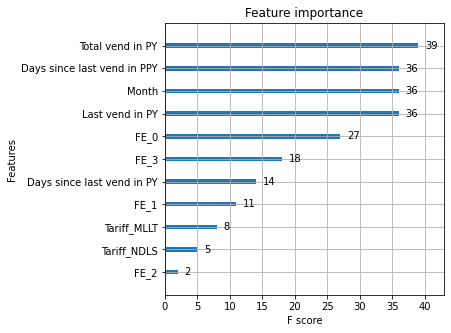

In [73]:
#Feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [93]:
test_data = pd.DataFrame(np.array(y_test),columns = ["Y_test"])
pred_data = pd.DataFrame(np.array(y_hat_test),columns = ["Prediction"])
diff = np.array(y_test) - y_hat_test
diff = pd.DataFrame(np.array(diff),columns = ["Difference"])

diff_df = pd.concat([test_data, pred_data, diff], axis = 1)

print("Difference/Actual : ",diff_df["Difference"].sum()/diff_df["Y_test"].sum())

Difference/Actual :  0.32771667843496205


0.32771667843496205

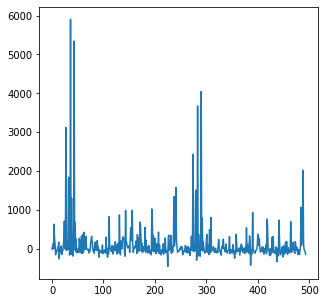

In [79]:
#y_validation, preds

import seaborn as sns
#sns.scatterplot(x=y_validation, y=preds)
#plt.plot(np.array(y_validation))
plt.plot(diff_df["Difference"])

plt.show()

In [80]:
print("The average difference is: ", diff_df["Difference"].mean())
print("The standard deviation is: ", diff_df["Difference"].std())
print("Total consumption difference is: ", diff_df["Difference"].sum())

The average difference is:  122.6609030889596
The standard deviation is:  544.5497747068479
Total consumption difference is:  60594.486125946045


(array([  9., 318., 106.,  26.,  14.,   6.,   2.,   4.,   1.,   2.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.]),
 array([-451.06350708, -196.94793945,   57.16762817,  311.2831958 ,
         565.39876343,  819.51433105, 1073.62989868, 1327.74546631,
        1581.86103394, 1835.97660156, 2090.09216919, 2344.20773682,
        2598.32330444, 2852.43887207, 3106.5544397 , 3360.67000732,
        3614.78557495, 3868.90114258, 4123.01671021, 4377.13227783,
        4631.24784546, 4885.36341309, 5139.47898071, 5393.59454834,
        5647.71011597, 5901.82568359]),
 <a list of 25 Patch objects>)

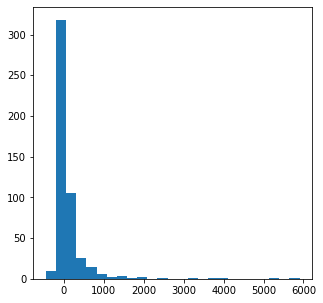

In [81]:
plt.hist(diff_df["Difference"], bins = 25)

In [85]:
final_df_imp = final_df[["Month","Year","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]
final_df_imp.head()

,Month,Year,FE_0,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Billed unit
0,4,2021,39844.964,36538.711,5000.0,5000.0,117.0,5000.0,446.0,43
1,4,2021,39844.964,36538.711,15000.0,10000.0,100.0,20000.0,870.0,168
2,4,2021,39844.964,36538.711,30000.0,10000.0,108.0,10000.0,408.0,293
3,4,2021,39844.964,36538.711,10000.0,5000.0,245.0,6000.0,479.0,85
4,4,2021,39844.964,36538.711,79830.0,20000.0,32.0,10000.0,436.0,915


In [87]:
train_data_f_imp, test_data_f_imp = prepare_train_test_data(final_df_imp)
#Discarding the Year field
train_data_f_imp = train_data_f_imp[["Month","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]
test_data_f_imp = test_data_f_imp[["Month","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]
train_data_f_imp.shape, test_data_f_imp.shape

((6743, 9), (494, 9))

In [89]:
X_imp, y_imp = train_data_f_imp.iloc[:,:-1],train_data_f_imp.iloc[:,-1]
X_test_imp, y_test_imp = test_data_f_imp.iloc[:,:-1],test_data_f_imp.iloc[:,-1]

In [90]:
X_train_imp, X_validation_imp, y_train_imp, y_validation_imp = train_test_split(X_imp, y_imp, test_size=test_percentage, random_state=SEED)

In [91]:
xg_reg_imp = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10) #objective ='reg:linear'
xg_reg_imp.fit(X_train_imp,y_train_imp)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
             objective='reg:squarederror')

In [92]:
#Model evaluation (after considering only important features)
#Training set
y_hat_training_imp, rmse_train_imp = model_evaluation(xg_reg_imp,X_train_imp,y_train_imp)
print("The RMSE of training data is: ",rmse_train_imp )

#Validation set
y_hat_val_imp, rmse_val_imp = model_evaluation(xg_reg_imp,X_validation_imp,y_validation_imp )
print("The RMSE of validation data is: ",rmse_val_imp )

#Test set
y_hat_test_imp, rmse_test_imp = model_evaluation(xg_reg_imp,X_test_imp,y_test_imp )
print("The RMSE of testing data is: ",rmse_test_imp )

# Without important features
# The RMSE of training data is:  644.0155768276783
# The RMSE of validation data is:  806.382764244073
# The RMSE of testing data is:  557.6557021132714


The RMSE of training data is:  616.6453784568358
The RMSE of validation data is:  788.053712335811
The RMSE of testing data is:  499.9418813042543


In [94]:
test_data_imp = pd.DataFrame(np.array(y_test_imp),columns = ["Y_test"])
pred_data_imp = pd.DataFrame(np.array(y_hat_test_imp),columns = ["Prediction"])
diff_imp = np.array(y_test_imp) - y_hat_test_imp
diff_imp = pd.DataFrame(np.array(diff_imp),columns = ["Difference"])

diff_df_imp = pd.concat([test_data_imp, pred_data_imp, diff_imp], axis = 1)

print("Difference/Actual : ",diff_df_imp["Difference"].sum()/diff_df_imp["Y_test"].sum())

Difference/Actual :  0.2766249890651081


#**USING PYCARET LIBRARY**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import io
import math
import warnings
warnings.filterwarnings('ignore')

#Library for importing files in local drive in colab notebook
from google.colab import files

from pycaret.regression import *


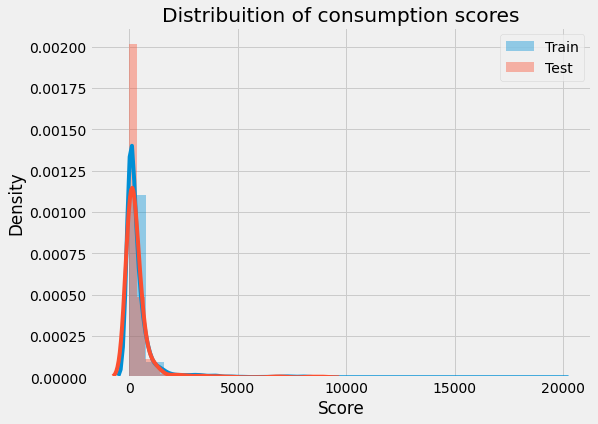

In [24]:
# Checking the distribution of the target variable:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train_data_f["Billed unit"], bins=25, label = "Train")
sns.distplot(test_data_f["Billed unit"], bins=25, label = "Test")
plt.xlabel('Score')
plt.legend()
plt.title('Distribuition of consumption scores');

In [25]:
# Descriptive statistics for target:
train_data_f["Billed unit"].describe()

count     6743.000000
mean       443.407385
std        982.607959
min          0.000000
25%         18.000000
50%        151.000000
75%        448.000000
max      19736.000000
Name: Billed unit, dtype: float64

In [26]:
print(f'Train Kurtosis: {train_data_f["Billed unit"].kurt()}')
print(f'Train Asymmetry (Skewness): {train_data_f["Billed unit"].skew()}')
print(f'Test Kurtosis: {test_data_f["Billed unit"].kurt()}')
print(f'Test Asymmetry (Skewness): {test_data_f["Billed unit"].skew()}')


Train Kurtosis: 49.11990007358662
Train Asymmetry (Skewness): 5.731886082494525
Test Kurtosis: 47.256827431616436
Test Asymmetry (Skewness): 6.181187178413992


**Kurtosis** is used to identify outliers in the distribution. If the **kurtosis** is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails)

If **skewness** is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. In above case, it is highly skewed towards right.

In [27]:
#Only select critical features
final_df_imp = final_df[["Month","Year","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]


In [29]:
train_data_f_imp, test_data_f_imp = prepare_train_test_data(final_df_imp,test_data_month=2)
#Discarding the Year field
train_data_f_imp = train_data_f_imp[["Month","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]
test_data_f_imp = test_data_f_imp[["Month","FE_0","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Billed unit"]]

#Discarding both "Year" and "Month" fields
# train_data_f_imp = train_data_f_imp[["FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]
# test_data_f_imp = test_data_f_imp[["FE_0","FE_1","FE_2","FE_3","Total vend in PY","Last vend in PY","Days since last vend in PY","Last vend in PPY","Days since last vend in PPY","Tariff_MLLT","Tariff_NDLS","Billed unit"]]

train_data_f_imp.shape, test_data_f_imp.shape

((6743, 9), (494, 9))

In [30]:
#Finding unique months data available in test data
print(test_data_f_imp["Month"].unique())

#Separating test data frame as per different months
test_data_f_imp_3 = test_data_f_imp[test_data_f_imp["Month"]==3]
test_data_f_imp_4 = test_data_f_imp[test_data_f_imp["Month"]==4]

print("The shape of March test data: ", test_data_f_imp_3.shape)
print("The shape of April test data: ", test_data_f_imp_4.shape)

[4 3]
The shape of March test data:  (247, 9)
The shape of April test data:  (247, 9)


In [31]:
train_data_f_imp.head()

,Month,FE_0,FE_3,Total vend in PY,Last vend in PY,Days since last vend in PY,Last vend in PPY,Days since last vend in PPY,Billed unit
0,2,33233.121,32465.487,5000.0,5000.0,56.0,5000.0,385.0,24
1,2,33233.121,32465.487,15000.0,10000.0,39.0,20000.0,809.0,101
2,2,33233.121,32465.487,40000.0,10000.0,47.0,10000.0,398.0,197
3,2,33233.121,32465.487,10000.0,5000.0,184.0,6000.0,418.0,28
4,2,33233.121,32465.487,59830.0,20000.0,30.0,10000.0,375.0,380


In [32]:
train_data_f_imp.columns

Index(['Month', 'FE_0', 'FE_3', 'Total vend in PY', 'Last vend in PY',
       'Days since last vend in PY', 'Last vend in PPY',
       'Days since last vend in PPY', 'Billed unit'],
      dtype='object')

In [33]:
# Creating a pipeline to setup the model
pipeline = setup(data=train_data_f_imp, target='Billed unit', 
                 remove_multicollinearity=True,
                 normalize_method='minmax',
                 multicollinearity_threshold=0.95, 
                 normalize=True, #polynomial_features = True, polynomial_degree = 2,
                 #ignore_features = ['Month'],
                 session_id=1991
                 )

,Description,Value
0,session_id,1991
1,Target,Billed unit
2,Original Data,"(6743, 9)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4720, 19)"


In [34]:
best_model = compare_models() #default CV = 10


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,167.0647,181848.3408,386.3238,0.8160,2.0062,1.5443,0.141
br,Bayesian Ridge,181.9562,176938.2000,383.0475,0.8155,2.1848,2.3518,0.017
lr,Linear Regression,181.7330,176945.4805,383.0460,0.8155,2.1805,2.3160,0.281
lar,Least Angle Regression,183.6347,177426.1529,383.7498,0.8151,2.1992,2.4159,0.019
lasso,Lasso Regression,180.8865,177680.4812,384.0172,0.8147,2.1474,2.1246,0.016
ridge,Ridge Regression,184.0412,178031.9656,384.7596,0.8147,2.2026,2.4759,0.014
huber,Huber Regressor,175.9298,178312.0738,384.7625,0.8141,2.0767,1.7207,0.110
par,Passive Aggressive Regressor,176.5013,181948.0090,389.9336,0.8106,2.0353,1.5339,0.100
omp,Orthogonal Matching Pursuit,181.4628,181385.7759,389.6510,0.8099,1.9892,1.5095,0.015
llar,Lasso Least Angle Regression,185.3949,185679.5834,395.1652,0.8062,2.0965,1.8788,0.016


In [35]:
#Creating Light Gradient Boosting model with different learning rates
# lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]
# print(len(lgbms))
lr = np.arange(0.1,1,0.1)
R2 = []

for i in lr:
  lgbm = create_model('lightgbm', fold=10, round=2, learning_rate = i)
  R2.append(pull()["R2"]["Mean"])

R2_df = pd.DataFrame(R2, index = lr, columns = ["R2"])
R2_df

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,201.11,144075.39,379.57,0.73,2.23,4.01
1,216.83,201861.46,449.29,0.68,2.17,1.88
2,225.48,271882.58,521.42,0.64,1.91,1.96
3,263.43,883435.28,939.91,0.36,2.14,1.85
4,199.56,136168.94,369.01,0.87,2.25,2.20
5,267.68,266587.48,516.32,0.84,2.21,1.95
6,230.32,224664.47,473.99,0.73,2.10,1.78
7,240.94,202218.29,449.69,0.79,1.92,2.00
8,221.45,214691.47,463.35,0.82,2.29,1.75
9,195.19,129745.02,360.20,0.69,2.15,1.73


,R2
0.1,0.82
0.2,0.81
0.3,0.79
0.4,0.78
0.5,0.77
0.6,0.77
0.7,0.76
0.8,0.75
0.9,0.71


In [36]:
model = create_model('lightgbm', fold=10, round=2, learning_rate=0.1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,168.07,106613.81,326.52,0.80,2.13,3.99
1,153.73,123996.98,352.13,0.80,2.04,1.14
2,171.01,122851.03,350.50,0.84,1.82,2.02
3,215.99,850404.25,922.17,0.39,2.01,1.16
4,148.04,105668.99,325.07,0.90,2.16,1.21
5,186.06,113900.17,337.49,0.93,2.11,1.29
6,163.32,109010.22,330.17,0.87,2.00,1.22
7,156.32,98019.02,313.08,0.90,1.68,1.11
8,163.94,122228.90,349.61,0.90,2.18,1.09
9,144.18,65790.03,256.50,0.84,1.95,1.21


In [37]:
model = tune_model(model, fold=10, n_iter = 50, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,176.3070,112584.0242,335.5354,0.7869,2.1524,3.7847
1,166.1001,138420.5819,372.0492,0.7811,2.0754,1.3127
2,168.5017,111400.1202,333.7666,0.8516,1.8372,2.4047
3,216.0684,828672.0818,910.3143,0.4019,2.0288,1.5948
4,158.4044,104503.2136,323.2696,0.9029,2.1738,1.2459
5,188.7796,107044.0448,327.1759,0.9341,2.1453,1.4706
6,168.0787,114448.9318,338.3030,0.8602,2.0340,1.3474
7,168.1777,96284.2598,310.2971,0.8977,1.7653,1.2960
8,173.1142,138399.8195,372.0213,0.8847,2.1914,1.2047
9,156.8451,70393.9353,265.3186,0.8311,2.0087,1.4729


In [38]:
# Checking score after cross-validation:
prediction = predict_model(model, verbose = 0)
#Saving the prediction result in a dataframe
holdout_score = pull()
display(holdout_score)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,167.5872,98585.2841,313.9829,0.9035,2.0616,1.6734


In [39]:
# Checking model parameters:
print(model)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=280, n_jobs=-1, num_leaves=30, objective=None,
              random_state=1991, reg_alpha=1e-07, reg_lambda=0.0005,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


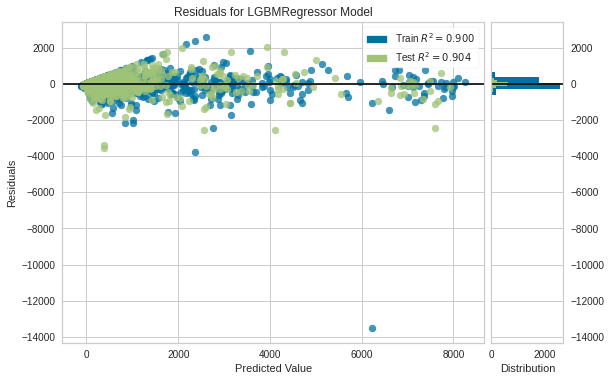

In [40]:
# Residuals Plot 
plot_model(model, plot='residuals')

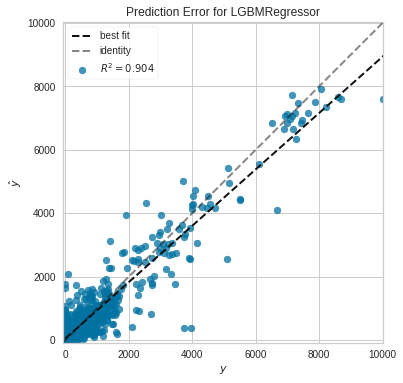

In [41]:
# Prediction Error 
plot_model(model, plot='error')

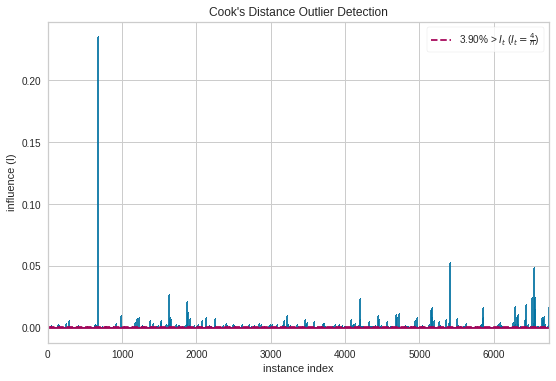

In [42]:

# Cooks Distance Plot
plot_model(model, plot='cooks')

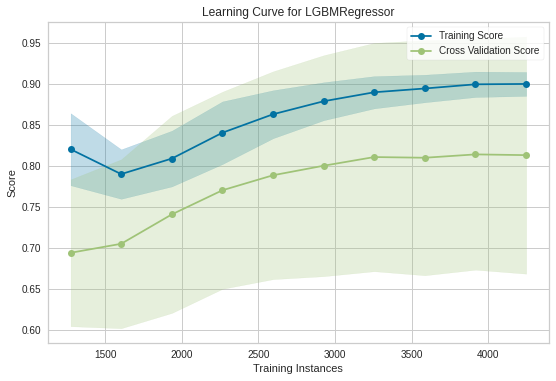

In [43]:
# Learning Curve
plot_model(model, plot='learning')

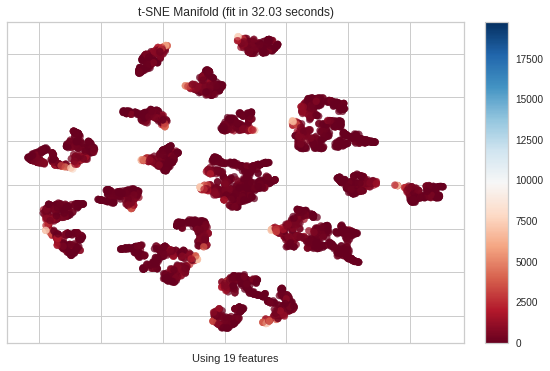

In [44]:
# Manifold Learning
plot_model(model, plot='manifold')

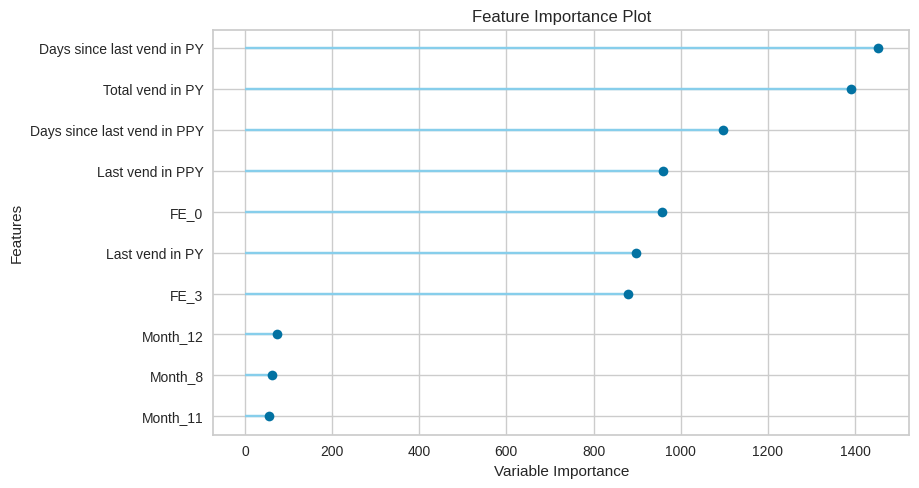

In [45]:
# Feature Importance
plot_model(model, plot='feature')

In [159]:
#Predicting for test data
def model_prediction(model, df):
  predictions = predict_model(model, data=df, round=2)
  predictions["Label"][predictions['Label'] < 0] = 0
  total_predicted = predictions["Label"].sum()
  total_actual_value = df["Billed unit"].sum()
  diff = predictions["Label"] - df["Billed unit"]
  total_difference = diff.sum()
  percentage_diff = diff.sum()*100/df["Billed unit"].sum()
  return total_actual_value, total_predicted, total_difference, np.round(percentage_diff,2)


In [160]:
model_prediction(model, test_data_f_imp)

(184899, 182056.04505483597, -2842.9549451640087, -1.54)

In [161]:
model_prediction(model, test_data_f_imp_3)

(83144, 99363.47552285342, 16219.475522853414, 19.51)

In [162]:
model_prediction(model, test_data_f_imp_4)

(101755, 82692.56953198258, -19062.430468017417, -18.73)

#**BLENDING AND STACKING**

In [51]:
top5_models = compare_models(n_select = 5, sort = 'R2', fold = 10)
print("\nModels with descending R2 values")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
pull().sort_values(by="R2", ascending = False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,167.0647,181848.3408,386.3238,0.8160,2.0062,1.5443,0.097
br,Bayesian Ridge,181.9562,176938.2000,383.0475,0.8155,2.1848,2.3518,0.018
lr,Linear Regression,181.7330,176945.4805,383.0460,0.8155,2.1805,2.3160,0.017
lar,Least Angle Regression,183.6347,177426.1529,383.7498,0.8151,2.1992,2.4159,0.018
lasso,Lasso Regression,180.8865,177680.4812,384.0172,0.8147,2.1474,2.1246,0.017
ridge,Ridge Regression,184.0412,178031.9656,384.7596,0.8147,2.2026,2.4759,0.017
huber,Huber Regressor,175.9298,178312.0738,384.7625,0.8141,2.0767,1.7207,0.109
par,Passive Aggressive Regressor,176.5013,181948.0090,389.9336,0.8106,2.0353,1.5339,0.105
omp,Orthogonal Matching Pursuit,181.4628,181385.7759,389.6510,0.8099,1.9892,1.5095,0.016
llar,Lasso Least Angle Regression,185.3949,185679.5834,395.1652,0.8062,2.0965,1.8788,0.015



Models with descending R2 values
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,167.0647,181848.3408,386.3238,0.8160,2.0062,1.5443,0.097
br,Bayesian Ridge,181.9562,176938.2000,383.0475,0.8155,2.1848,2.3518,0.018
lr,Linear Regression,181.7330,176945.4805,383.0460,0.8155,2.1805,2.3160,0.017
lar,Least Angle Regression,183.6347,177426.1529,383.7498,0.8151,2.1992,2.4159,0.018
lasso,Lasso Regression,180.8865,177680.4812,384.0172,0.8147,2.1474,2.1246,0.017
ridge,Ridge Regression,184.0412,178031.9656,384.7596,0.8147,2.2026,2.4759,0.017
huber,Huber Regressor,175.9298,178312.0738,384.7625,0.8141,2.0767,1.7207,0.109
par,Passive Aggressive Regressor,176.5013,181948.0090,389.9336,0.8106,2.0353,1.5339,0.105
omp,Orthogonal Matching Pursuit,181.4628,181385.7759,389.6510,0.8099,1.9892,1.5095,0.016
llar,Lasso Least Angle Regression,185.3949,185679.5834,395.1652,0.8062,2.0965,1.8788,0.015


In [54]:
#Tuning each model 
tuned_top5_models = [tune_model(i, n_iter=120, optimize = "R2", fold = 10) for i in top5_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,195.8424,127878.7891,357.6014,0.7580,2.2793,4.8375
1,178.7518,150966.3594,388.5439,0.7613,2.2287,1.8229
2,179.7359,110880.5078,332.9872,0.8523,2.0041,2.6336
3,229.9957,799184.6875,893.9713,0.4232,2.2024,2.4003
4,159.0013,100313.9766,316.7238,0.9068,2.2992,2.9805
5,185.1408,91298.5156,302.1564,0.9438,2.2843,2.0086
6,173.9767,104500.4688,323.2653,0.8724,2.1959,1.9097
7,174.4160,86723.9141,294.4893,0.9079,1.8962,1.2963
8,184.8506,130565.2578,361.3381,0.8913,2.3527,1.8602
9,154.0980,67645.6328,260.0877,0.8377,2.0870,1.4761


###**Blend and Stack multiple models**

In [57]:
blender = blend_models(estimator_list=tuned_top5_models[0:], fold = 10, optimize = "R2", choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,186.9218,119060.2847,345.0511,0.7747,2.2459,4.4937
1,170.8614,146228.6756,382.3986,0.7688,2.1768,1.5765
2,174.8635,109563.4346,331.0037,0.8541,1.9767,2.5136
3,223.5982,802906.4491,896.0505,0.4205,2.1385,2.0240
4,153.9920,99246.5703,315.0342,0.9078,2.2808,2.4431
5,177.6318,87721.1496,296.1776,0.9460,2.2685,1.8252
6,168.7534,104390.6984,323.0955,0.8725,2.1260,1.6486
7,166.9362,81386.5531,285.2833,0.9136,1.8509,1.2312
8,179.4273,128970.0627,359.1240,0.8926,2.3219,1.6701
9,147.2503,63990.3455,252.9631,0.8465,2.0334,1.3164


In [58]:
stacker = stack_models(estimator_list=tuned_top5_models[1:], meta_model=tuned_top5_models[0], fold = 10, optimize = "R2", choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,175.3542,106607.9008,326.5087,0.7982,2.2806,4.7636
1,165.9420,140589.7993,374.9531,0.7777,2.2329,1.8505
2,174.3761,115539.1368,339.9105,0.8461,1.9751,2.6517
3,220.8329,820268.0104,905.6865,0.4080,2.2281,1.9666
4,160.5940,115804.3580,340.3004,0.8924,2.3668,2.1285
5,182.7274,100865.7917,317.5938,0.9379,2.2841,1.6640
6,172.7427,110317.5372,332.1408,0.8653,2.2102,1.7151
7,158.3056,81848.4326,286.0917,0.9131,1.8784,1.5576
8,173.9210,134478.5465,366.7132,0.8880,2.3542,1.5634
9,149.9761,61758.7731,248.5131,0.8518,2.1185,1.6605


Use plot_model() function to generate multiple side by side plots like residual plots, prediction error, cook's distance outlier and cross validation learning rate.

In [158]:
# #Comparing blend and stacked models performance side by side

# fig = plt.figure(figsize=(15,5), dpi = 80)
# ax = fig.add_subplot(1,2,1)
# plot_model(blender, plot='residuals', save = True, verbose = 0, scale = 1.1)
# ax = fig.add_subplot(1,2,2)
# plot_model(stacker, plot='residuals', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,3)
# # plot_model(blender, plot='error', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,4)
# # plot_model(stacker, plot='error', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,5)
# # plot_model(blender, plot='cooks', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,6)
# # plot_model(stacker, plot='cooks', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,7)
# # plot_model(blender, plot='learning', save = True, verbose = 0, scale = 1.1)
# # ax = fig.add_subplot(4,2,8)
# # plot_model(stacker, plot='learning', save = True, verbose = 0, scale = 1.1)
# plt.savefig("blender_vs_stacker_performance_charts.png", dpi = 300, pad_inches = 0.25)
# plt.show()

In [68]:
# We can execute the predict_model() function to use the model to generate the predicted values. 
pred_tuned_blender = predict_model(blender, verbose = 0)
#Saving the prediction result in a dataframe
holdout_score_blender = pull()
display(holdout_score_blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,172.2112,97995.2995,313.042,0.9041,2.1457,1.761


In [69]:
# We can execute the predict_model() function to use the model to generate the predicted values. 
pred_tuned_stacker = predict_model(stacker, verbose = 0)
#Saving the prediction result in a dataframe
holdout_score_stacker = pull()
display(holdout_score_stacker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,168.1064,100555.4621,317.1048,0.9016,2.1686,1.9361


In [70]:
# The Blend model seems to perform better in both our train and test so let us finalize it. The finalize_model() function trains the model on the entire dataset. 
finalize_blender = finalize_model(blender)
finalize_blender

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.5, bagging_freq=2,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           feature_fraction=1.0,
                                           importance_type='split',
                                           learning_rate=0.01, max_depth=-1,
                                           min_child_samples=16,
                                           min_child_weight=0.001,
                                           min_split_gain=0.3, n_estimators=260,
                                           n_jobs=-1, num_leaves=200,
                                           objective=None, ran...
                             Lars(copy_X=True, eps=0.005, fit_intercept=True,
                                  fit_path=True, 

In [71]:
# The Blend model seems to perform better in both our train and test so let us finalize it. The finalize_model() function trains the model on the entire dataset. 
finalize_stacker = finalize_model(stacker)
finalize_stacker

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7FCDC6FD25A0,
   shuffle=False),
                  estimators=[('br',
                               BayesianRidge(alpha_1=0.2, alpha_2=0.001,
                                             alpha_init=None,
                                             compute_score=False, copy_X=True,
                                             fit_intercept=True, lambda_1=0.05,
                                             lambda_2=0.2, lambda_init=None,
                                             n_iter=300, normalize=True,
                                             tol=0.001, verbose=False)),
                              ('lr',
                               LinearRegression(co...
                                                feature_fraction=1.0,
                                                importance_type='split',
                                                learning_rate=0.01,
                                

In [123]:
#Predicting for test data
def model_prediction(model, df):
  predictions = predict_model(model, data=df, round=2)
  predictions["Label"][predictions['Label'] < 0] = 0
  total_predicted = predictions["Label"].sum()
  total_actual_value = df["Billed unit"].sum()
  diff = predictions["Label"] - df["Billed unit"]
  total_difference = diff.sum()
  percentage_diff = diff.sum()*100/df["Billed unit"].sum()
  return total_actual_value, total_predicted, total_difference, np.round(percentage_diff,2)

In [150]:
#Predicting for test data
def model_prediction_graphs(model, df, graph_name):
  predictions = predict_model(model, data=df, round=2)
  predictions["Label"][predictions['Label'] < 0] = 0
  total_predicted = predictions["Label"].sum()
  total_actual_value = df["Billed unit"].sum()
  diff = predictions["Label"] - df["Billed unit"]
  total_difference = diff.sum()
  percentage_diff = diff.sum()*100/df["Billed unit"].sum()
  fig=plt.figure(figsize=(10,10), dpi = 80)
  ax = fig.add_subplot(2,2,1)
  sns.distplot(diff,
                  bins=20,
                  kde=True,
                  color="#c6690c")
  plt.title("Distribution of difference between Actual and Predicted Value (Label)")
  plt.ylabel("Count")
  plt.xlabel("Consumption values")
  
  ax = fig.add_subplot(2,2,2)
  sns.distplot(predictions["Billed unit"],
                  bins=20,
                  kde=True,
                  color="#c6690c")
  sns.distplot(predictions["Label"],
                  bins=20,
                  kde=True,
                  color="#664697")
  plt.title("Distribution between Actual and Predicted Value (Label)")
  plt.ylabel("Count")
  plt.xlabel("Consumption values")
  plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=7)
  ax = fig.add_subplot(2,2,3)
  sns.regplot(x="Billed unit", y="Label", data=predictions, lowess=False, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
  plt.title("Linear Relationship between Actual and Predicted Value (Label)")
  plt.ylabel("Predicted Value (Label)")
  plt.xlabel("Actual Value")
  plt.legend(('Best Fit', 'Actual vs Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=7)
  ax = fig.add_subplot(2,2,4)
  sns.residplot(x="Billed unit", y="Label", data=predictions, lowess=False, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
  plt.title("Residuals for the Predicted values in Final Blend Model")
  plt.ylabel("Residuals")
  plt.xlabel("Predicted Value (Label)")
  plt.legend(('Best Fit', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=7)
  fig.tight_layout()
  plt.savefig(graph_name, dpi = 300, pad_inches = 0.25)
  plt.show()

In [156]:
model_prediction(finalize_blender, test_data_f_imp)

(184899, 180939.1723742218, -3959.82762577821, -2.14)

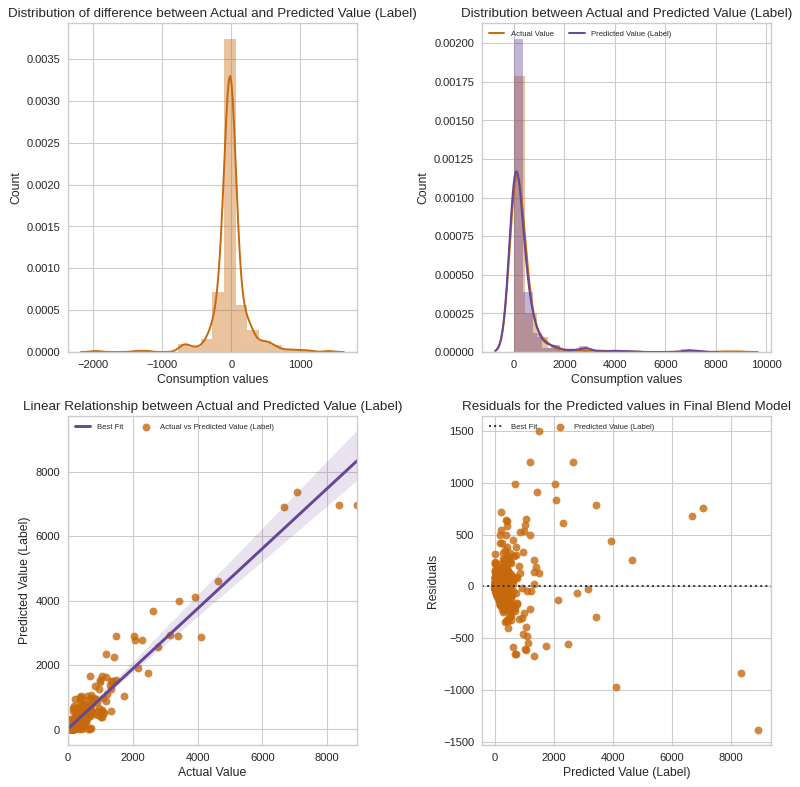

In [151]:
model_prediction_graphs(finalize_blender, test_data_f_imp,"blender_2month.png" )

In [154]:
model_prediction(finalize_blender, test_data_f_imp_3)

(83144, 85100.36896774695, 1956.3689677469547, 2.35)

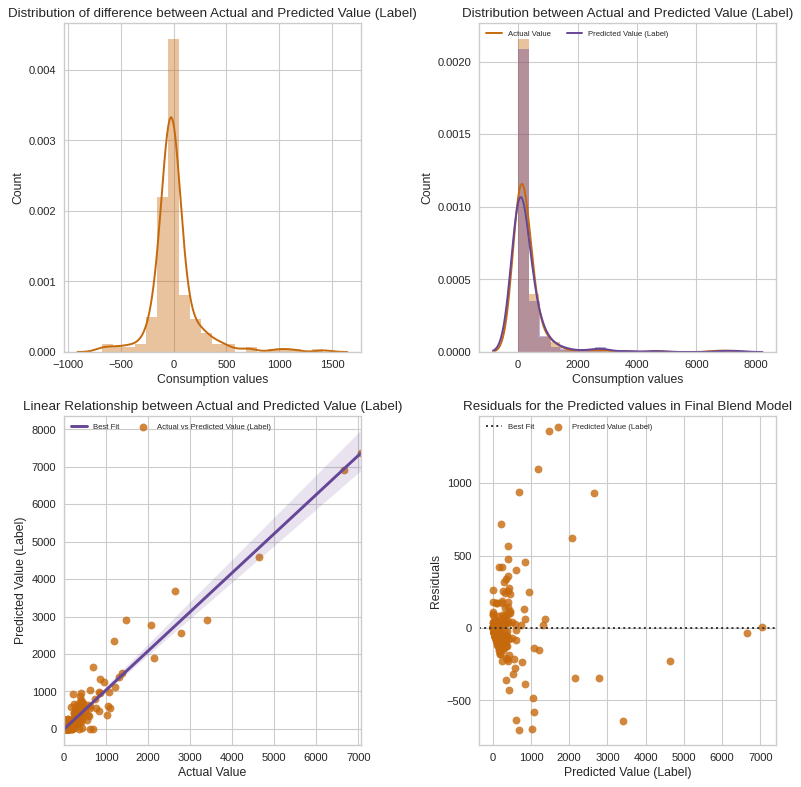

In [152]:
model_prediction_graphs(finalize_blender, test_data_f_imp_3, "blender_Mar.png")

In [155]:
model_prediction(finalize_blender, test_data_f_imp_4)

(101755, 95838.80340647484, -5916.196593525165, -5.81)

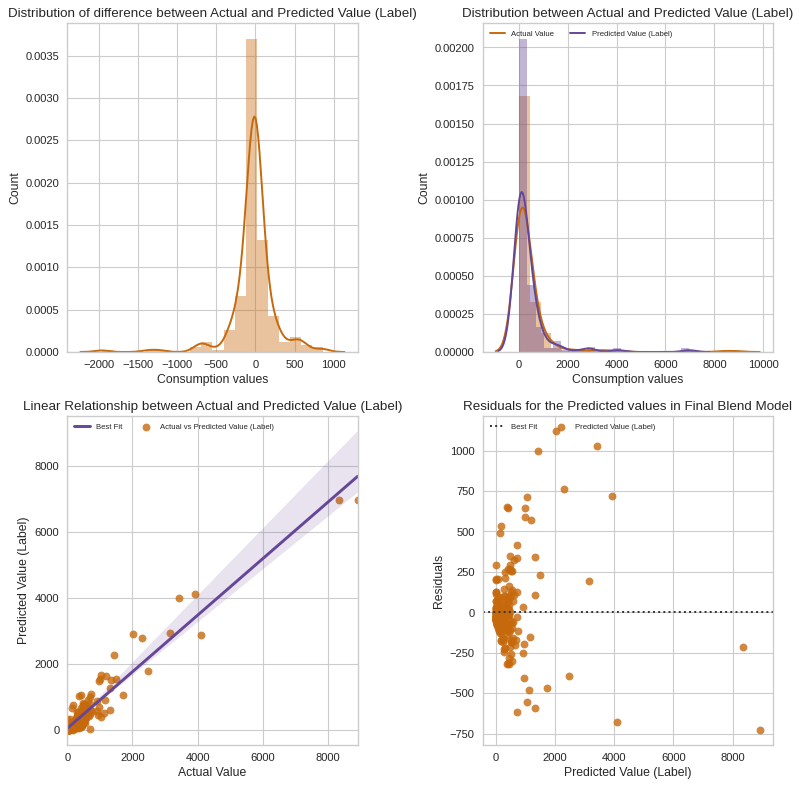

In [153]:
model_prediction_graphs(finalize_blender, test_data_f_imp_4, "blender_Apr.png")

In [157]:
model_prediction(finalize_stacker, test_data_f_imp)

(184899, 187769.1266317563, 2870.1266317563095, 1.55)

In [79]:
model_prediction(finalize_stacker, test_data_f_imp_3, )

(83144, 92442.27943266211, 9298.279432662113, 11.18)

In [80]:
model_prediction(finalize_stacker, test_data_f_imp_4)

(101755, 95326.84719909419, -6428.152800905803, -6.32)